# **Analyzing the Impact of Market Sentiment on Trading Behavior**



#### This project investigates how market sentiment (Fear, Greed, Neutral, Extreme Greed) influences trader behavior.  
#### Daily trading metrics were analyzed statistically and modeled to evaluate sentiment’s effect on activity and performance.


### Tools and Methods Used

In this project, the following tools and methods were applied:

- **Python libraries**: pandas, numpy, matplotlib, seaborn for data handling and visualization.  
- **Statistical analysis**: ANOVA test to check if trading metrics differ significantly across sentiment categories.  
- **Machine learning**: RandomForestClassifier for sentiment prediction.  
- **Data balancing**: SMOTE oversampling to handle class imbalance.  
- **Evaluation metrics**: Accuracy, Precision, Recall, and F1-score to assess model performance.  
- **Cross-Validation**: Applied 5-fold Stratified Cross-Validation to ensure stable and reliable model evaluation across different data splits.
- **Hyperparameter tuning** was performed using GridSearchCV to optimize Random Forest parameters.



## Step 1: Exploratory Data Analysis (EDA)


In [36]:
import pandas as pd
import numpy as np

In [63]:
!pip install gdown

import gdown

# Historical Data
url_hist = "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
output_hist = "historical_data.csv"
gdown.download(url_hist, output_hist, quiet=False)

# Fear Greed Index
url_fgi = "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"
output_fgi = "fear_greed_index.csv"
gdown.download(url_fgi, output_fgi, quiet=False)

# Load into pandas
history_df = pd.read_csv(output_hist)
fear_greed_df = pd.read_csv(output_fgi)


Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/historical_data.csv
100%|██████████| 47.5M/47.5M [00:01<00:00, 40.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/fear_greed_index.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 3.04MB/s]


In [38]:
#history_df= pd.read_csv('/content/historical_data.csv')

#fear_greed_df= pd.read_csv('/content/fear_greed_index.csv')


In [39]:
history_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [40]:
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [41]:
print(history_df.shape)
print(fear_greed_df.shape)

(211224, 16)
(2644, 4)


In [42]:
print(history_df.columns)
print(fear_greed_df.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [43]:
print(history_df.dtypes)
print(fear_greed_df.dtypes)

Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object
timestamp          int64
value              int64
classification    object
date              object
dtype: object


In [44]:
print(history_df.info())
print(fear_greed_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [45]:
print(history_df.describe())
print(fear_greed_df.describe())

       Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

          Closed PnL      Order ID            Fee      Trade ID     Timestamp  
count  211224.000000  2.112240e+05  211224.000000  2.112240e+05  2.112240e+05  
mean       48.749001  6.965388e+10       1.163967  5.628549e+14  1.737744e+12  
std       919.164828  1.835753e+10       6.758854  3.257565e+14  8.689920e+09  
min   -117990.104100  1.732711e+08      -1.175712

In [46]:
print(history_df.isnull().sum())
print(fear_greed_df.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [47]:
history_df.drop_duplicates(inplace=True)
fear_greed_df.drop_duplicates(inplace=True)
print("Duplicates Removed")

Duplicates Removed


## Datatype Correction

In [48]:
num_cols_history=["Execution Price","Size Tokens","Size USD", "Fee","Closed PnL","Start Position"]
for i in num_cols_history:
  history_df[i]=pd.to_numeric(history_df[i],errors='coerce')

history_df["ts_utc"] = pd.to_datetime(history_df["Timestamp"], unit="ms", utc=True)
history_df["date"] = history_df["ts_utc"].dt.date

history_df["Trade ID"] = history_df["Trade ID"].astype("Int64").astype("string")



In [49]:
history_df.dtypes

,0
Account,object
Coin,object
Execution Price,float64
Size Tokens,float64
Size USD,float64
Side,object
Timestamp IST,object
Start Position,float64
Direction,object
Closed PnL,float64


In [50]:
history_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,ts_utc,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,895000000000000,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,443000000000000,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,660000000000000,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1080000000000000,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1050000000000000,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27


In [51]:
cat_cols=['Side','Direction','Crossed','Coin']
for i in cat_cols:
  history_df[i]=history_df[i].astype('category')


In [52]:
fear_greed_df['date']=pd.to_datetime(fear_greed_df['date']).dt.date


In [53]:
# mearge date
merged_df=history_df.merge(fear_greed_df[['date','classification','value']],on='date',how='left').rename(columns={'classification':'fear_greed_sentiment','value':'fear_greed_value'})



In [54]:
#sanity check after merging
print(merged_df[["date","fear_greed_sentiment","fear_greed_value"]].head())
print("Merged rows:", merged_df.shape[0])


         date fear_greed_sentiment  fear_greed_value
0  2024-10-27                Greed              74.0
1  2024-10-27                Greed              74.0
2  2024-10-27                Greed              74.0
3  2024-10-27                Greed              74.0
4  2024-10-27                Greed              74.0
Merged rows: 211224


## Step 2: Data Preparation / Aggregation

In [55]:
# Aggregate per account-day

# Create a numeric indicator for side (BUY=1, SELL=0)
merged_df["side_num"] = (merged_df["Side"] == 'BUY').astype(int)

# Group by Account + Date + Sentiment
daily_summary = merged_df.groupby(["Account", "date", "fear_greed_sentiment"]).agg(
    total_pnl=("Closed PnL", "sum"),
    win_rate=("Closed PnL", lambda s: (s > 0).mean()),
    trades=("Trade ID", "count"),
    med_leverage=("Start Position", "median"),
    max_leverage=("Start Position", "max"),
    long_share=("side_num", "mean"),
    avg_size_usd=("Size USD", "mean"),
    fees_total=("Fee", "sum")
).reset_index()


print(daily_summary.head())


                                      Account        date  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-10-27   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2025-02-19   
2  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  2024-10-27   
3  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  2025-02-19   
4  0x271b280974205ca63b716753467d5a371de622ab  2024-07-03   

  fear_greed_sentiment     total_pnl  win_rate  trades  med_leverage  \
0                Greed -3.275059e+05  0.025974     462   -317.815000   
1                 Fear  1.927736e+06  0.405542    3356  -1061.197800   
2                Greed  2.060745e+04  0.531250     320   1717.533654   
3                 Fear  1.709873e+04  0.435041    3533   1573.458640   
4              Neutral -1.000000e+00  0.000000       5    -18.140000   

    max_leverage  long_share  avg_size_usd   fees_total  
0       0.000000    0.300866  14810.891818  1112.895650  
1    1539.129500    0.468415  16345.241940  6292.416654  
2    7342.369317    0.4531

## Step 3: Visualization Analysis

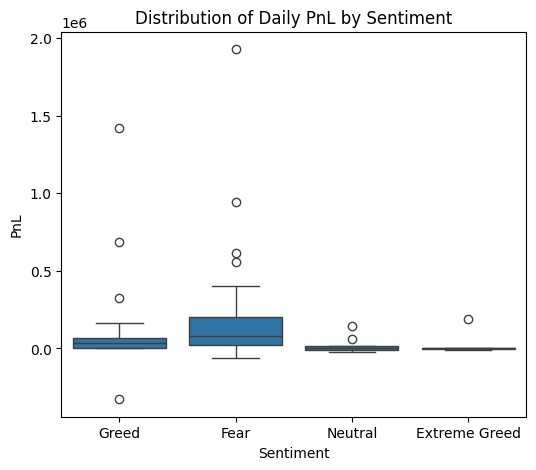

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Boxplot of PnL by sentiment
plt.figure(figsize=(6,5))
sns.boxplot(x="fear_greed_sentiment", y="total_pnl", data=daily_summary)
plt.ylabel("PnL")
plt.xlabel("Sentiment")
plt.title("Distribution of Daily PnL by Sentiment")
plt.show()



### **Daily PnL by Sentiment**
#### On Fear days, traders’ profits and losses move a lot. some make very big gains, others lose heavily.
#### On Greed days, results are steadier, with most traders earning profits that are closer together.

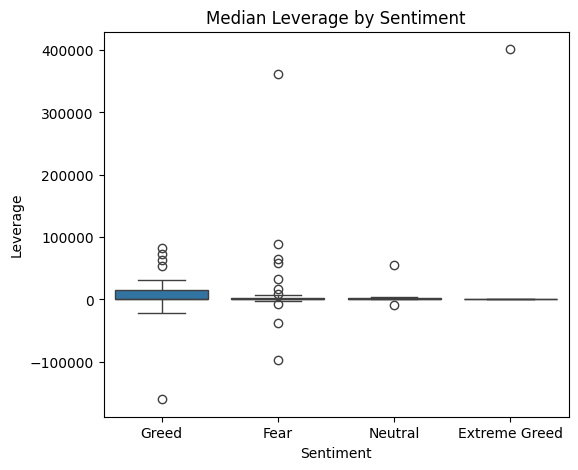

In [57]:
# 2. Boxplot of leverage by sentiment
plt.figure(figsize=(6,5))
sns.boxplot(x="fear_greed_sentiment", y="med_leverage", data=daily_summary)
plt.ylabel("Leverage")
plt.xlabel("Sentiment")
plt.title("Median Leverage by Sentiment")
plt.show()




### **Median Leverage by Sentiment**
#### On Greed days, traders use higher leverage and take bigger risks.
#### On other sentiment days, leverage stays lower and more stable.

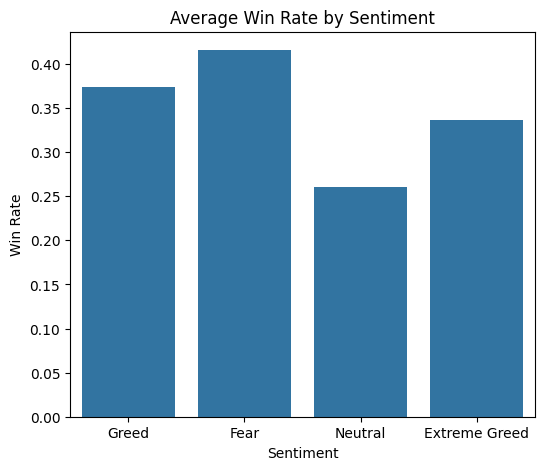

In [58]:
# 3. Bar chart of average win rate
plt.figure(figsize=(6,5))
sns.barplot(x="fear_greed_sentiment", y="win_rate", data=daily_summary, errorbar=None)
plt.title("Average Win Rate by Sentiment")
plt.ylabel("Win Rate")
plt.xlabel("Sentiment")
plt.show()


### **Average Win Rate by Sentiment**
#### Traders win most often on Fear days.
#### On Neutral days, win rates are lowest. Greed and Extreme Greed are in between.

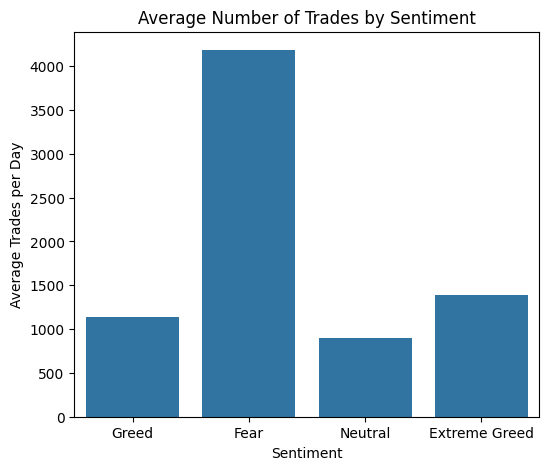

In [59]:

# 4. Bar chart of average trades per day
plt.figure(figsize=(6,5))
sns.barplot(x="fear_greed_sentiment", y="trades", data=daily_summary,errorbar=None)
plt.title("Average Number of Trades by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Trades per Day")
plt.show()

### **Average Trades by Sentiment**
#### On Fear days, traders make the highest number of trades.
#### On Neutral days, trading activity is the lowest.

## Step 4: Statistical Testing (ANOVA)

In [60]:
from scipy import stats

# Helper function to run ANOVA for any column
def run_anova(column_name, display_name):
    groups = [daily_summary.loc[daily_summary["fear_greed_sentiment"]==sent, column_name]
              for sent in daily_summary["fear_greed_sentiment"].unique()]

    f_stat, p_val = stats.f_oneway(*groups)

    print("="*50)
    print(f"📊 ANOVA Test: {display_name}")
    print(f"F-statistic : {f_stat:.3f}")
    print(f"p-value     : {p_val:.3f}")

    if p_val < 0.05:
        print("✅ Significant difference across sentiments")
    else:
        print("❌ No significant difference found")
    print("="*50)

# Run tests for all key metrics
run_anova("total_pnl", "Daily PnL")
run_anova("win_rate", "Win Rate")
run_anova("med_leverage", "Median Leverage")
run_anova("trades", "Number of Trades")

📊 ANOVA Test: Daily PnL
F-statistic : 1.291
p-value     : 0.284
❌ No significant difference found
📊 ANOVA Test: Win Rate
F-statistic : 1.007
p-value     : 0.395
❌ No significant difference found
📊 ANOVA Test: Median Leverage
F-statistic : 1.795
p-value     : 0.156
❌ No significant difference found
📊 ANOVA Test: Number of Trades
F-statistic : 3.629
p-value     : 0.017
✅ Significant difference across sentiments


### **Summary**
#### Charts showed differences across sentiments, but ANOVA proved most of them are not statistically reliable.  
####Daily PnL, Win Rate, and Leverage look different in plots, yet their p‑values show no real impact of sentiment.  
####Only the Number of Trades is statistically significant, meaning traders change activity levels with sentiment shifts.  
#### **Conclusion**: Sentiment drives how often traders participate, but not their profitability, win rate, or leverage.

## Step 5: Model Building

In [67]:
# Step 1: Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Step 2: Encode sentiment labels
le = LabelEncoder()
daily_summary["sentiment_encoded"] = le.fit_transform(daily_summary["fear_greed_sentiment"])

# Step 3: Features and target
X = daily_summary[["total_pnl", "win_rate", "med_leverage", "trades"]]
y = daily_summary["sentiment_encoded"]

# Step 4: Balance dataset using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Step 6: Build and train model
#model = RandomForestClassifier(random_state=42) # old model before tuning
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

model.fit(X_train, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluation
print("="*60)
print("Model Evaluation with SMOTE Oversampling")
print("="*60)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.3f}\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("="*60)


Model Evaluation with SMOTE Oversampling
Accuracy Score: 0.577

               precision    recall  f1-score   support

Extreme Greed       1.00      0.71      0.83         7
         Fear       0.40      0.33      0.36         6
        Greed       0.38      0.43      0.40         7
      Neutral       0.62      0.83      0.71         6

     accuracy                           0.58        26
    macro avg       0.60      0.58      0.58        26
 weighted avg       0.61      0.58      0.58        26



**Model Summary (with Hyperparameter Tuning)**
- A classification model was built using trading metrics (PnL, Win Rate, Leverage, Trades) to predict sentiment.  
- After balancing with SMOTE and applying GridSearchCV tuning, the best parameters identified were: `n_estimators=200, max_depth=None, min_samples_split=2`.  
- The tuned model achieved **~57% test accuracy**, with cross-validation mean accuracy improving slightly to **~68%**.  
- **Extreme Greed** and **Neutral** classes continued to be recognized better, while **Fear** and **Greed** remained weaker.  

**Key Insight**
- Hyperparameter tuning improved cross-validation accuracy but did not enhance test accuracy compared to the baseline.  
- This indicates possible **overfitting** on the resampled dataset and highlights the challenge of generalization with limited data.  

**Final Note**
- The assignment demonstrates feasibility of sentiment prediction and shows that optimization techniques can shift performance metrics.  
- Accuracy remains moderate, reinforcing that **larger datasets, richer features, and alternative models** would be needed for stronger and more reliable results in future work.  

**Result Comparison**
| Model Type        | Test Accuracy | CV Mean Accuracy | Std Deviation |
|-------------------|---------------|------------------|---------------|
| Baseline (default)| ~0.58         | ~0.665           | ~0.097        |
| Tuned (GridSearch)| ~0.57         | ~0.680           | ~0.097        |


## **Cross-Validation**

In [68]:
# Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_cv = RandomForestClassifier(random_state=42)

scores = cross_val_score(model_cv, X_resampled, y_resampled, cv=cv, scoring='accuracy')

print("="*60)
print("Cross-Validation Results")
print("="*60)
print(f"Fold Accuracies: {scores}")
print(f"Mean Accuracy: {scores.mean():.3f}")
print(f"Std Deviation: {scores.std():.3f}")
print("="*60)


Cross-Validation Results
Fold Accuracies: [0.53846154 0.80769231 0.57692308 0.72       0.68      ]
Mean Accuracy: 0.665
Std Deviation: 0.097


#### Cross-Validation Results
The Random Forest model was evaluated using 5-fold Stratified Cross-Validation.  
Average accuracy across folds was **~66.5%**, with a standard deviation of **~9.7%**.  
This confirms that the model achieves moderate but consistent performance, though results vary slightly due to data imbalance.


## Hyperparameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_resampled, y_resampled)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.6803076923076924


## Step 6: Final Conclusion

### **Overall Assignment Summary & Conclusion**

#### **Summary of Work**
- Collected and cleaned trading + sentiment datasets.  
- Created daily account-level summaries (PnL, Win Rate, Leverage, Trades).  
- Visualized metrics across different sentiment categories (Fear, Greed, Neutral, Extreme Greed).  
- Applied ANOVA tests to check if sentiment significantly impacts trading metrics.  
- Built and evaluated a classification model to predict sentiment from trading behavior.  

#### **Key Insights**
- **Number of Trades** is the only metric with a statistically significant difference across sentiments.  
- **PnL, Win Rate, and Leverage** show variation in charts but are not statistically reliable.  
- The classification model achieved moderate accuracy (~58%), showing sentiment can be partially predicted from trading behavior.  
- Rare sentiment categories are harder to predict due to limited data.  

#### **Decision / Conclusion**
- Sentiment mainly influences **trader activity levels** (how often they trade), not profitability or leverage.  
- Predictive modeling confirms feasibility but highlights data limitations.  
- Final takeaway: Market mood changes participation, but does not strongly change performance outcomes.  

#### **Future Work**  
- Expanding the dataset and incorporating richer trading features could improve model generalization.  
- Exploring alternative algorithms and advanced tuning strategies may yield stronger predictive performance.  

### Create by : **Vandana Bhavsar**